In [23]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="darkgrid")

## Introdution

In this notebook, we are going to analyse the metadata from csv files (train.csv and test.csv). The train.csv file have 8 attributes (columns) and 33.126 samples (columns). The colunm description is:

* image_name: the image by itself doesn´t have any information regarding the target. So, this metadata has the image name so that we can check information of each image.
* patient_id: unique patient identifier
* sex: the sex of the patient (when unknown, will be blank)
* age_approx: approximate patient age at time of imaging
* anatom_site_general_challenge: location of imaged site
* diagnosis: detailed diagnosis information (train only)
* benign_malignant: indicator of malignancy of imaged lesion
* target: binarized version of the target variable

In [3]:
metadata_train = pd.read_csv('data/csv/train.csv')  

In [7]:
metadata_train

,image_name,patient_id,sex,age_approx,anatom_site_general_challenge,diagnosis,benign_malignant,target
0,ISIC_2637011,IP_7279968,male,45.0,head/neck,unknown,benign,0
1,ISIC_0015719,IP_3075186,female,45.0,upper extremity,unknown,benign,0
2,ISIC_0052212,IP_2842074,female,50.0,lower extremity,nevus,benign,0
3,ISIC_0068279,IP_6890425,female,45.0,head/neck,unknown,benign,0
4,ISIC_0074268,IP_8723313,female,55.0,upper extremity,unknown,benign,0
...,...,...,...,...,...,...,...,...
33121,ISIC_9999134,IP_6526534,male,50.0,torso,unknown,benign,0
33122,ISIC_9999320,IP_3650745,male,65.0,torso,unknown,benign,0
33123,ISIC_9999515,IP_2026598,male,20.0,lower extremity,unknown,benign,0
33124,ISIC_9999666,IP_7702038,male,50.0,lower extremity,unknown,benign,0


## General

As a fresh start, we will take a look at data distribution for each attribute. By doing this, we can understand the problem as well as unbalanced data.

##### 1 - Patient ID

Although ID isn´t normally used, I want to check if there is more than one image per patient. We can do that by using the pandas value_counts() method. As we can see, each patient has a different number of images. For instance, IP_4938382 has 115 samples, while IP_6342052 has 84. Also, these samples are unique as we can see using the duplicated() method.      

In [56]:
metadata_train.iloc[:,1].value_counts()[:20]

IP_4938382    115
IP_7279968    115
IP_4479736    115
IP_4382720    115
IP_0656529    114
IP_4488328    104
IP_9147454    102
IP_3057277    102
IP_1139701    102
IP_6245507    102
IP_4419570    102
IP_7330399    101
IP_1969685    100
IP_5889408     98
IP_2153088     92
IP_0660290     92
IP_5805281     91
IP_6071452     87
IP_6512345     85
IP_6342052     84
Name: patient_id, dtype: int64

In [68]:
metadata_train[metadata_train["patient_id"] == 'IP_4938382'].duplicated()

509      False
543      False
765      False
857      False
885      False
         ...  
31394    False
31570    False
32017    False
32531    False
33048    False
Length: 115, dtype: bool

#### 2 - Sex and Age

As we can see, data seems balanced for this attribute, resulting in ~16.000 samples for each class.
Regarding age, the distribution shows that the majority of patients have between 40 and 60 years old.

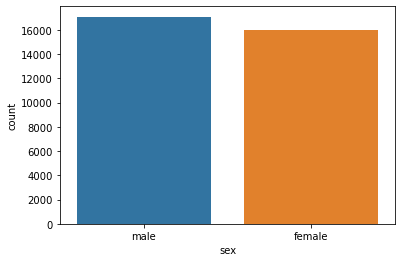

In [21]:
ax = sns.countplot(x="sex", data=metadata_train)

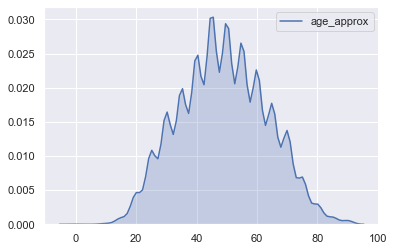

In [24]:
ax = sns.kdeplot(metadata_train['age_approx'], shade=True)

#### 3 - Diagnosis and body location

As we can see, more than 16.000 images are from torso. However,only ~5000 images were diagnosed with melanoma. This indicates that we probably have unbalanced data. Also, the majority of samples have an unknow diagnosis. We can check the unbalanced data by the countplot of the target class benign_malignant. 

In raw numbers, we have 584 samples for malignant class and 32542 otherwise.

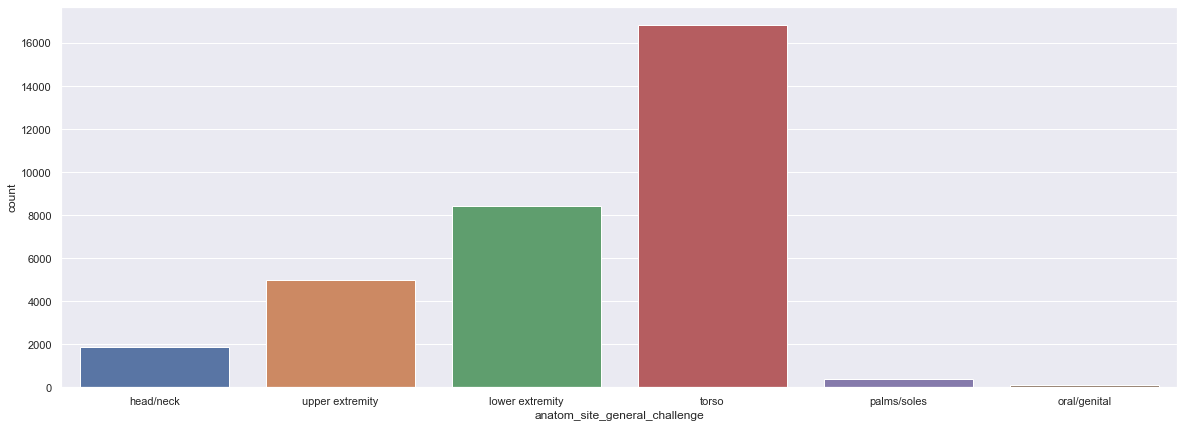

In [57]:
fig, ax = plt.subplots(figsize=(20,7))
sns.countplot(ax=ax,x="anatom_site_general_challenge", data=metadata_train)

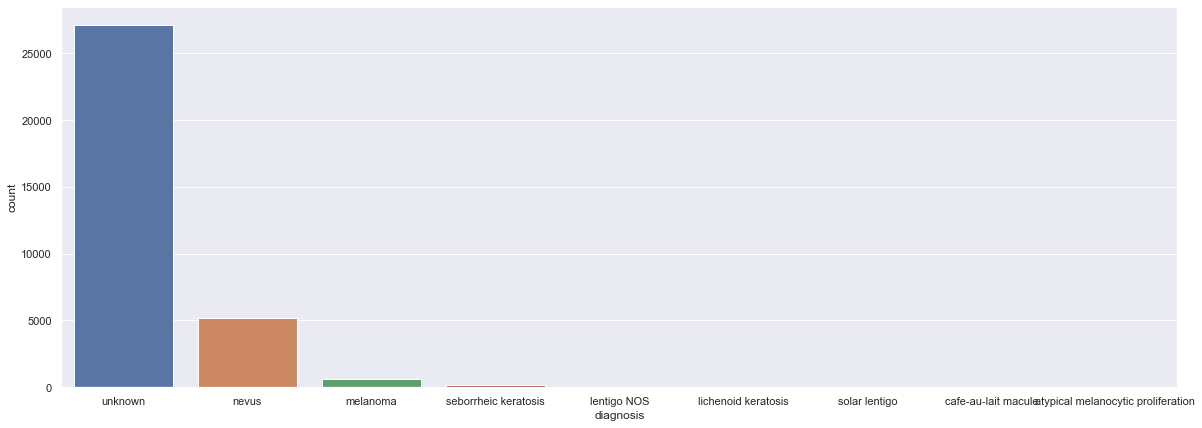

In [60]:
fig, ax = plt.subplots(figsize=(20,7))
ax = sns.countplot(ax=ax,x="diagnosis", data=metadata_train)

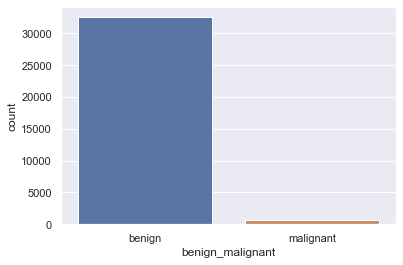

In [28]:
ax = sns.countplot(x="benign_malignant", data=metadata_train)

In [31]:
metadata_train['benign_malignant'].value_counts()

benign       32542
malignant      584
Name: benign_malignant, dtype: int64

## Malignant

Since we have unbalanced data, we will repeat the process above for each class (malignant/benign).

In [38]:
mal = metadata_train[metadata_train["benign_malignant"] == 'malignant']

In [39]:
mal

,image_name,patient_id,sex,age_approx,anatom_site_general_challenge,diagnosis,benign_malignant,target
91,ISIC_0149568,IP_0962375,female,55.0,upper extremity,melanoma,malignant,1
235,ISIC_0188432,IP_0135517,female,50.0,upper extremity,melanoma,malignant,1
314,ISIC_0207268,IP_7735373,male,55.0,torso,melanoma,malignant,1
399,ISIC_0232101,IP_8349964,male,65.0,torso,melanoma,malignant,1
459,ISIC_0247330,IP_3232631,female,65.0,lower extremity,melanoma,malignant,1
...,...,...,...,...,...,...,...,...
32969,ISIC_9955163,IP_7507212,male,55.0,upper extremity,melanoma,malignant,1
33000,ISIC_9963177,IP_1165806,male,70.0,torso,melanoma,malignant,1
33014,ISIC_9967383,IP_7887363,male,60.0,upper extremity,melanoma,malignant,1
33050,ISIC_9978107,IP_2860540,male,65.0,lower extremity,melanoma,malignant,1


#### Sex and Age

For this class, we have more male patients (350) than female (250). Also, the age distribution is quite different from the general study. We can the patients have between 40 and 80 years old, not 40 and 60.

Regarding anatom site, we still have the 'torso' as the body location with most images.

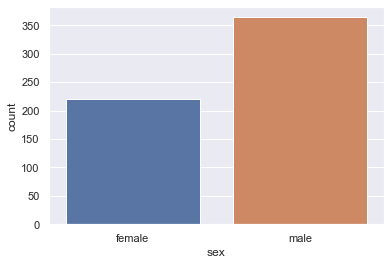

In [41]:
ax = sns.countplot(x="sex", data=mal)

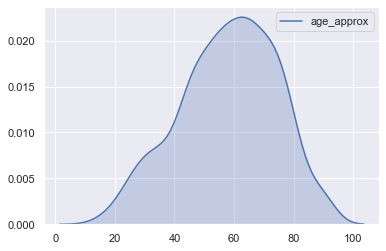

In [42]:
ax = sns.kdeplot(mal['age_approx'], shade=True)

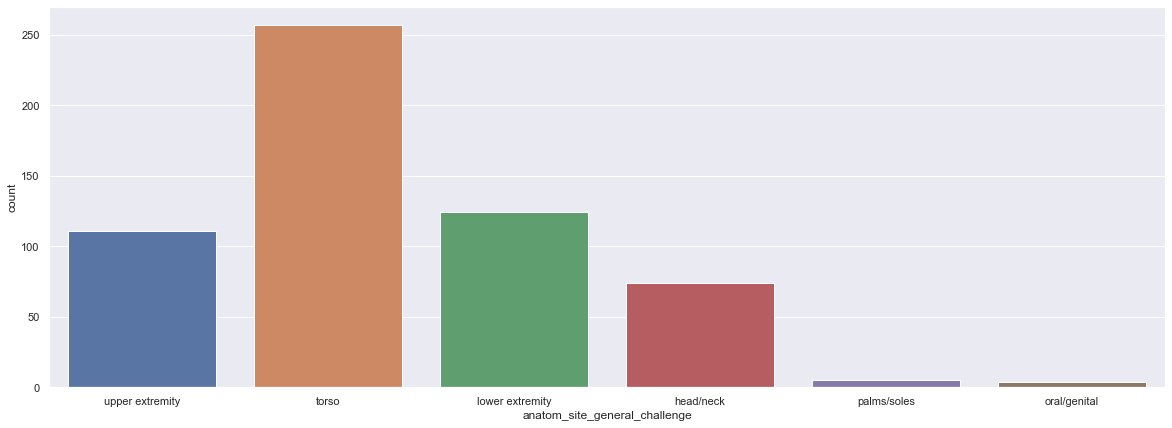

In [59]:
fig, ax = plt.subplots(figsize=(20,7))
ax = sns.countplot(ax=ax,x="anatom_site_general_challenge", data=mal)

### Benign

Benign is the majority class with more than 30.000 samples. With this, the data distribution is quite similar to the general one.

In [46]:
ben = metadata_train[metadata_train["benign_malignant"] == 'benign']

In [47]:
ben

,image_name,patient_id,sex,age_approx,anatom_site_general_challenge,diagnosis,benign_malignant,target
0,ISIC_2637011,IP_7279968,male,45.0,head/neck,unknown,benign,0
1,ISIC_0015719,IP_3075186,female,45.0,upper extremity,unknown,benign,0
2,ISIC_0052212,IP_2842074,female,50.0,lower extremity,nevus,benign,0
3,ISIC_0068279,IP_6890425,female,45.0,head/neck,unknown,benign,0
4,ISIC_0074268,IP_8723313,female,55.0,upper extremity,unknown,benign,0
...,...,...,...,...,...,...,...,...
33121,ISIC_9999134,IP_6526534,male,50.0,torso,unknown,benign,0
33122,ISIC_9999320,IP_3650745,male,65.0,torso,unknown,benign,0
33123,ISIC_9999515,IP_2026598,male,20.0,lower extremity,unknown,benign,0
33124,ISIC_9999666,IP_7702038,male,50.0,lower extremity,unknown,benign,0


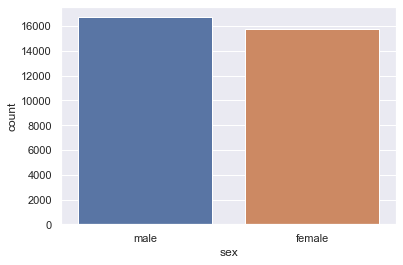

In [48]:
ax = sns.countplot(x="sex", data=ben)

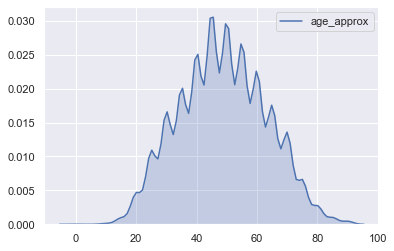

In [49]:
ax = sns.kdeplot(ben['age_approx'], shade=True)

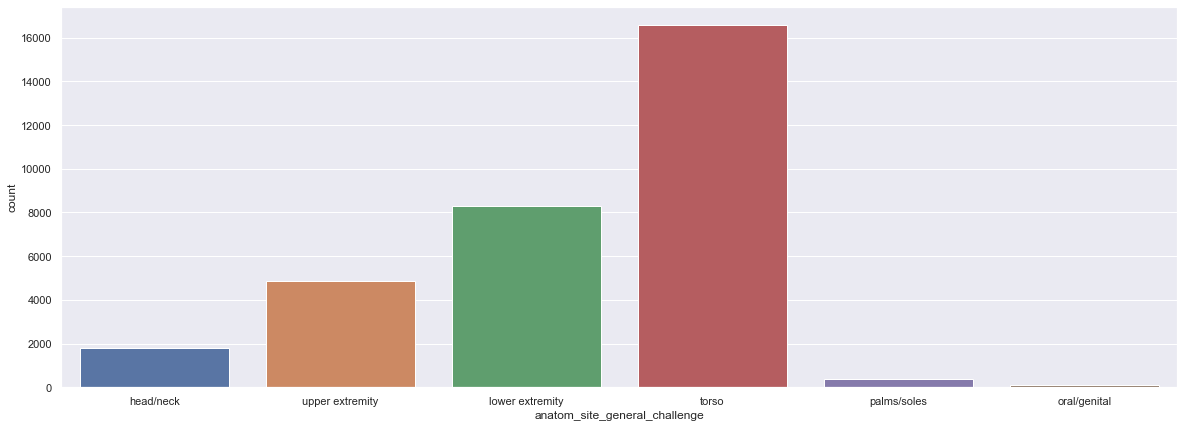

In [61]:
fig, ax = plt.subplots(figsize=(20,7))
ax = sns.countplot(ax=ax,x="anatom_site_general_challenge", data=ben)

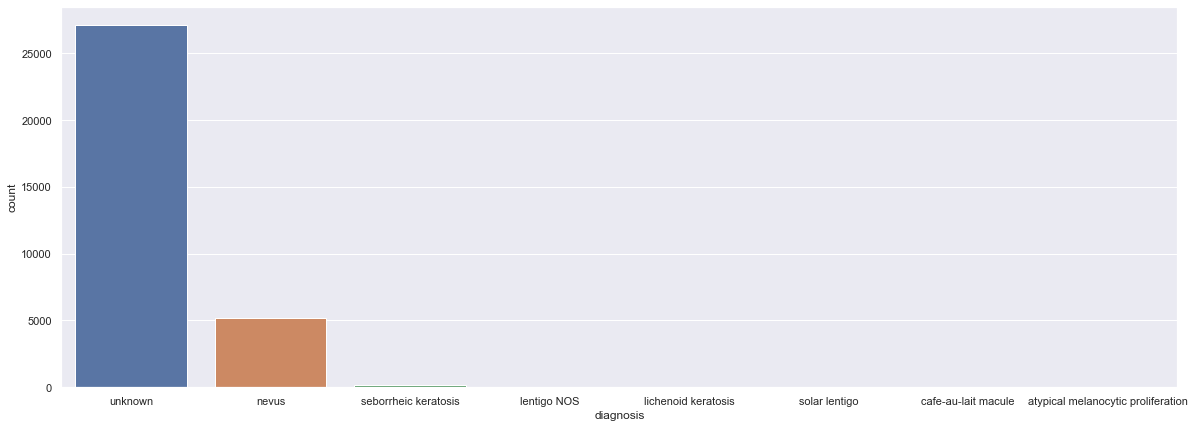

In [62]:
fig, ax = plt.subplots(figsize=(20,7))
ax = sns.countplot(ax=ax,x="diagnosis",orient='h',data=ben)